┌ Info: Saved animation to 
│   fn = /data/GitHub/mine/maths/julia-scripts/Chaos/Chen/tmp.gif
└ @ Plots /home/fusion809/.julia/packages/Plots/ZVLhV/src/animation.jl:104


Plots.AnimatedGif("/data/GitHub/mine/maths/julia-scripts/Chaos/Chen/tmp.gif")
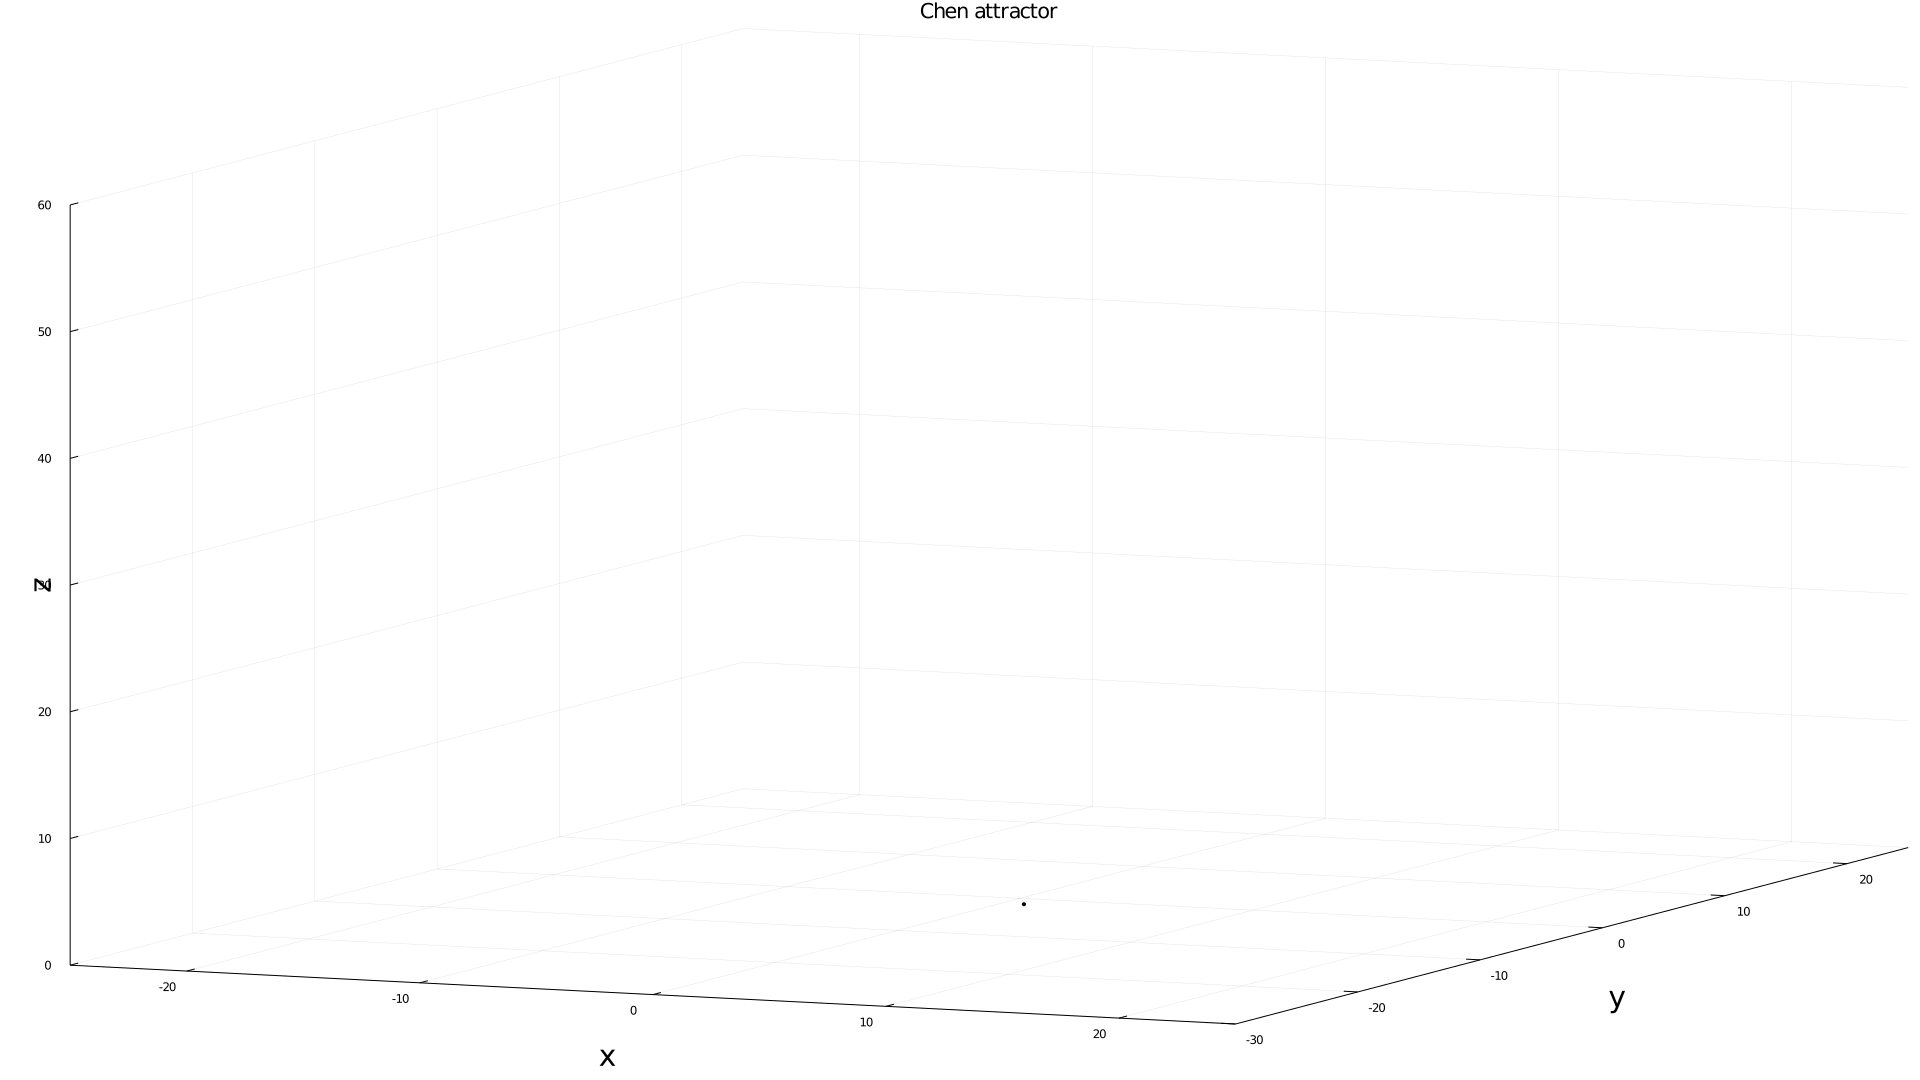

In [2]:
# Plots package
using Plots;

# Define the structure necessary for 3D plot
mutable struct Chen
    dt; a; b; c; x; y; z
end

# Equation of the Chen attractor
function chen(a,b,c,x,y,z)
    dx_dt  = a*(y-x);
    dy_dt  = x*(c-a-z)+c*y;
    dz_dt  = x*y-b*z;
    
    return dx_dt, dy_dt, dz_dt
end

# RK4 integrator
function RK4(a,b,c,dt,x,y,z)
    K1     = dt.*chen(a,b,c,x,y,z);
    k1     = K1[1];
    l1     = K1[2];
    m1     = K1[3];
    K2     = dt.*chen(a,b,c,x+k1/2,y+l1/2,z+m1/2);
    k2     = K2[1];
    l2     = K2[2];
    m2     = K2[3];
    K3     = dt.*chen(a,b,c,x+k2/2,y+l2/2,z+m2/2);
    k3     = K3[1];
    l3     = K3[2];
    m3     = K3[3];
    K4     = dt.*chen(a,b,c,x+k3,y+l3,z+m3);
    k4     = K4[1];
    l4     = K4[2];
    m4     = K4[3];
    
    dx     = 1/6*(k1+2*k2+2*k3+k4);
    dy     = 1/6*(l1+2*l2+2*l3+l4);
    dz     = 1/6*(m1+2*m2+2*m3+m4);
    return dx, dy, dz
end

# Step function
function step!(l::Chen)
    diff   = RK4(l.a, l.b, l.c, l.dt, l.x, l.y, l.z);
    l.x   += diff[1];
    l.y   += diff[2];
    l.z   += diff[3];
end

# Define the parameters of the problem and the solution
N          = 1e5;
N          = convert(Int64, N);
t0         = 0;
tf         = 50;
h          = (tf-t0)/N;
r0         = [-0.1; 0.5; -0.6];
parameters = [40; 3; 28];

# Integrator function
attractor = Chen((dt = h, a = parameters[1], b = parameters[2],
        c = parameters[3], x = r0[1], 
        y = r0[2], z = r0[3])...)

# initialize a 3D plot with 1 empty series
plt       = plot3d(1, xlim=(-25,25), ylim=(-30,25), 
                zlim=(0,60), 
                title = "Chen attractor", marker = 2,
                legendfontsize = 20,
                guidefontsize = 20,
                xlabel="x",
                ylabel="y",
                zlabel="z",
                size=(1920, 1080),
                label="")

# build an animated gif by pushing new points to the plot, 
# saving every 80th frame
@gif for i=1:N
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 80